Name: **Luong Nguyen**  
Student ID: **1504210**  

# Introduction to Deep Learning 

## Session07: reuters newswires classification with 1D convolution
____
Chollet's dense network achieved an accuracy of *~78%* , whereas our RNNs network from session06 achieved *~80%* accuracy. Let's see if 1D convolution could perform better.

## Import the packages needed for this assignment

In [2]:
# install keras on google colab
!pip install -q keras
# is GPU working?
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, GlobalMaxPooling1D, Dense, Conv1D
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical

## Prepare data

### Load data

In [4]:
from keras.datasets import reuters

max_features = 1000 # number of words to consider as features
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features, maxlen=maxlen)

2113536/2110848 [==============================] - 2s 1us/step


### Preprocess data

In [5]:
# pad sequence
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# one-hot encode labels
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

x_train shape: (4777, 100)
y_train shape: (4777, 46)
x_test shape: (1195, 100)
y_test shape: (1195, 46)


## Conv1D

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 94, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 46)                1518      
Total params: 40,718
Trainable params: 40,718
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/40
4777/4777 [==============================] - 3s 564us/step - loss: 3.1482 - acc: 0.4658 - val_loss: 2.2342 - val_acc: 0.5155
Epoch 2/40
4777/4777 [==============================] - 2s 481us/step - loss: 1.7749 -

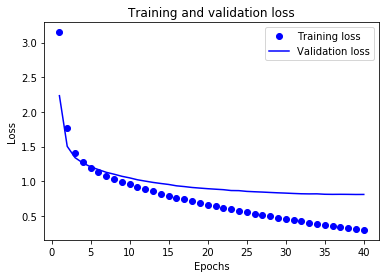

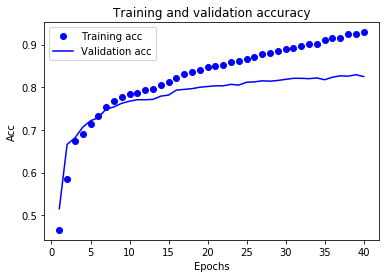

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

With Conv1D, we achieved an accuracy of **~82%** after 40 epochs, slightly better than **~78%** of our RNN. However, it only took about **3s** to train an epoch, compared to about **5s** of our RNN. 